In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [3]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [4]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

In [5]:
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

In [6]:
df = pd.read_csv('cv1-1-1.csv')
df_raw = df.copy()

In [7]:
df.head()

,Ret.Time,Proc.From,Proc.To,Mass,Area,Height,A/H,Conc.,Mark,Disease
0,4.163,4.01,4.200,TIC,199761034,27153794,7.36,14.01,,0
1,4.253,4.20,4.330,TIC,117549848,27808033,4.23,8.25,SV,1
2,4.313,4.30,4.330,TIC,1194903,1295251,0.92,0.08,T,0
3,4.361,4.33,4.380,TIC,8153694,3954332,2.06,0.57,V,0
4,4.393,4.38,4.417,TIC,3811701,2628854,1.45,0.27,V,0


In [8]:
df.describe()

,Ret.Time,Proc.From,Proc.To,Area,Height,A/H,Conc.,Disease
count,398.000000,398.000000,398.000000,3.980000e+02,3.980000e+02,398.000000,398.000000,398.000000
mean,19.204698,19.171108,19.250254,3.514308e+06,9.875267e+05,2.453492,0.246256,0.035176
std,8.095855,8.103119,8.098288,1.430832e+07,2.983894e+06,1.232292,1.003839,0.184456
min,4.163000,4.010000,4.200000,1.497000e+03,1.313000e+03,0.210000,0.000000,0.000000
25%,12.395000,12.347250,12.443250,7.185050e+04,4.740975e+04,1.510000,0.010000,0.000000
50%,20.017500,20.013500,20.031500,3.774160e+05,1.207710e+05,2.550000,0.030000,0.000000
75%,26.449250,26.439000,26.498000,1.365128e+06,4.464035e+05,3.247500,0.100000,0.000000
max,31.423000,31.420000,31.560000,1.997610e+08,2.780803e+07,7.470000,14.010000,1.000000


In [9]:
draw_missing_data_table(df)

,Total,Percent
Disease,0,0.0
Mark,0,0.0
Conc.,0,0.0
A/H,0,0.0
Height,0,0.0
Area,0,0.0
Mass,0,0.0
Proc.To,0,0.0
Proc.From,0,0.0
Ret.Time,0,0.0


In [10]:
df.dtypes

Ret.Time     float64
Proc.From    float64
Proc.To      float64
Mass          object
Area           int64
Height         int64
A/H          float64
Conc.        float64
Mark          object
Disease        int64
dtype: object

In [11]:
df.drop('Mass', axis=1, inplace=True)
df.head()

,Ret.Time,Proc.From,Proc.To,Area,Height,A/H,Conc.,Mark,Disease
0,4.163,4.01,4.200,199761034,27153794,7.36,14.01,,0
1,4.253,4.20,4.330,117549848,27808033,4.23,8.25,SV,1
2,4.313,4.30,4.330,1194903,1295251,0.92,0.08,T,0
3,4.361,4.33,4.380,8153694,3954332,2.06,0.57,V,0
4,4.393,4.38,4.417,3811701,2628854,1.45,0.27,V,0


In [12]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Ret.Time,Proc.From,Proc.To,Area,Height,A/H,Conc.,Disease,Mark_ V,Mark_SV,Mark_T,Mark_TV
0,4.163,4.01,4.200,199761034,27153794,7.36,14.01,0,0,0,0,0
1,4.253,4.20,4.330,117549848,27808033,4.23,8.25,1,0,1,0,0
2,4.313,4.30,4.330,1194903,1295251,0.92,0.08,0,0,0,1,0
3,4.361,4.33,4.380,8153694,3954332,2.06,0.57,0,1,0,0,0
4,4.393,4.38,4.417,3811701,2628854,1.45,0.27,0,1,0,0,0


In [17]:
X_data = df[df.loc[:, df.columns != 'Disease'].columns]
y_data = df['Disease']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)
X_data.shape, y_data.shape

((398, 11), (398,))

In [18]:
print('Inputs: \n', X_train.head())
print('Outputs: \n', y_train.head())

Inputs: 
      Ret.Time  Proc.From  Proc.To     Area   Height   A/H  Conc.  Mark_ V   \
298    26.456     26.453   26.513   270195   111810  2.42   0.02         1   
13      5.050      4.970    5.090  3787231  1673203  2.26   0.27         1   
376    30.286     30.283   30.313    18752    20318  0.92   0.00         0   
61      9.117      9.087    9.150  1497037   627090  2.39   0.11         1   
346    28.858     28.840   28.880    30590    19698  1.55   0.00         0   

     Mark_SV   Mark_T    Mark_TV   
298         0         0         0  
13          0         0         0  
376         0         0         1  
61          0         0         0  
346         0         0         1  
Outputs: 
 298    0
13     0
376    0
61     0
346    0
Name: Disease, dtype: int64


In [19]:
model = LogisticRegression(solver='lbfgs', multi_class='auto')
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/monn/anaconda3/envs/356/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.969 +/- 0.014


/home/monn/anaconda3/envs/356/lib/python3.5/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/monn/anaconda3/envs/356/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monn/anaconda3/envs/356/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monn/anaconda3/envs/356/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monn/anaconda3/envs/356/lib/python3.5

/home/monn/anaconda3/envs/356/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monn/anaconda3/envs/356/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

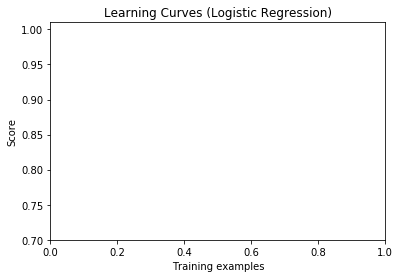

In [21]:
title = "Learning Curves (Logistic Regression)"
cv = 8
plot_learning_curve(logreg, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

In [18]:
cost_history = np.empty(shape=[1],dtype=float)
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        _,cost = sess.run([optimizer, cost_function], feed_dict={X: X_sub, Y: y_sub})
        cost_history = np.append(cost_history,cost)
    
    print('Validation accuracy: ',round(sess.run(accuracy, feed_dict={X: X_test, Y: y_test}) , 3))
    saver.save(sess, "model_adam.ckpt")

ValueError: Cannot feed value of shape (318, 11) for Tensor 'Placeholder:0', which has shape '(?, 193)'